In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
train_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data = np.array(train_df)
test_data = np.array(test_df)

In [5]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

In [6]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state=4)

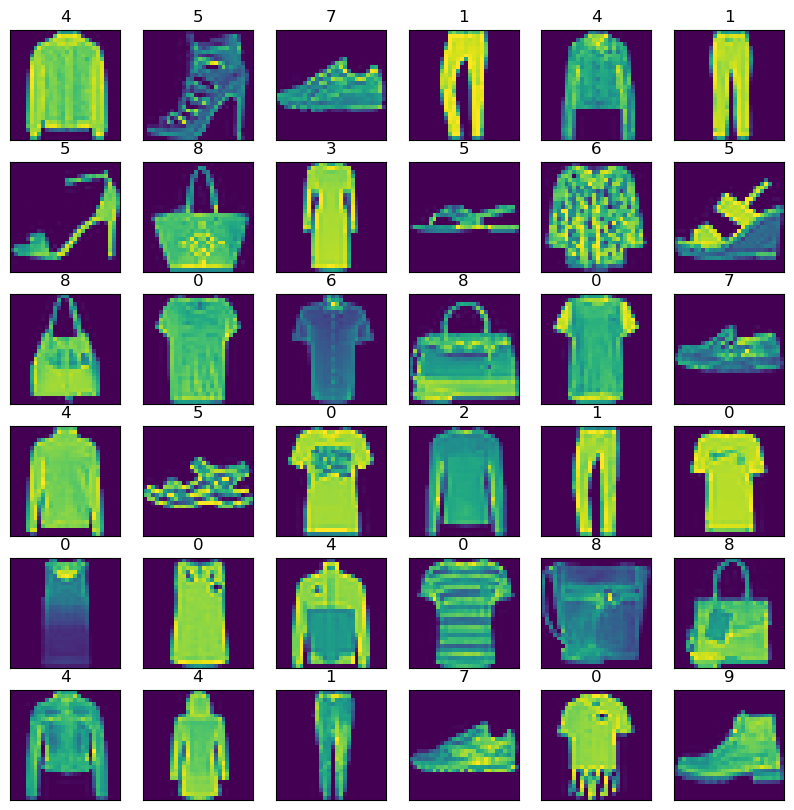

In [7]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [8]:
image_shape = (28,28,1)
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [10]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(),
              metrics=['acc'])

In [11]:
# Add early stopping            
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train,y_train,epochs=100,  
                     validation_data=(x_validate,y_validate))

Epoch 1/100


2023-06-09 20:56:54.884270: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1500/1500 [==============================] - 19s 6ms/step - loss: 0.8630 - acc: 0.6941 - val_loss: 0.5074 - val_acc: 0.8046
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5863 - acc: 0.7805 - val_loss: 0.4546 - val_acc: 0.8368
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5085 - acc: 0.8143 - val_loss: 0.3724 - val_acc: 0.8679
Epoch 4/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4590 - acc: 0.8346 - val_loss: 0.3412 - val_acc: 0.8752
Epoch 5/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4228 - acc: 0.8492 - val_loss: 0.3343 - val_acc: 0.8799
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4015 - acc: 0.8569 - val_loss: 0.3006 - val_acc: 0.8921
Epoch 7/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3814 - acc: 0.8648 - val_loss: 0.2994 - val_acc: 0.8907
Epoch 8/100
1500/1500 [==============================] - 10s 6m

Text(0.5, 1.0, 'Train - Accuracy')

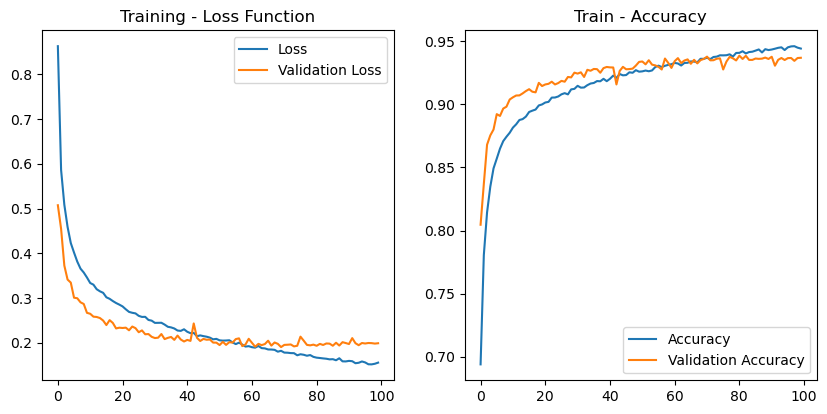

In [12]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [13]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.1756
Test Accuracy : 0.9428


In [14]:
# Generate predictions
predicted = model.predict(x_test)
predicted_classes = np.argmax(predicted, axis=-1)

313/313 [==============================] - 1s 2ms/step


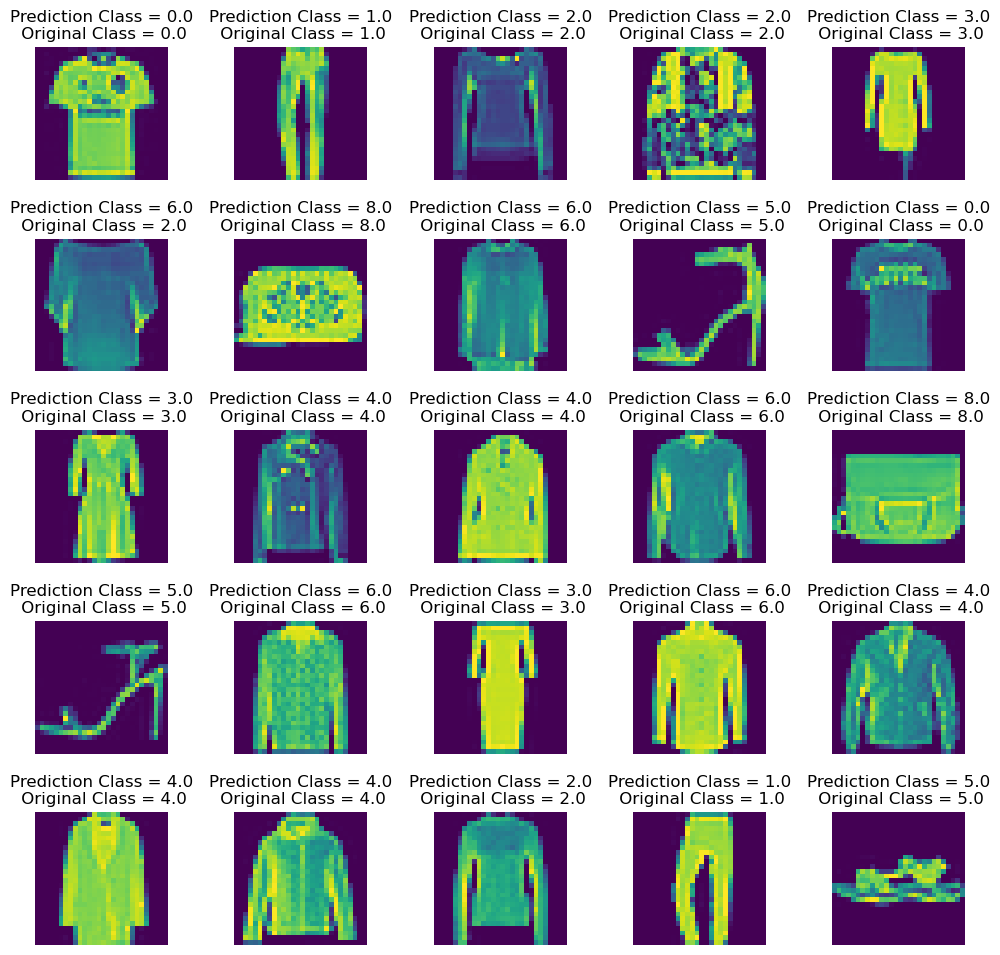

In [15]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W): 
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)